### MATH7017 Prababilistic Graphical Models
### ---Final Project---
#### Student Name - Gauri Ratawal
#### Student ID - 22032967

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the dataset
train_imgs = np.load('k49-train-imgs.npz')['arr_0']
train_labels = np.load('k49-train-labels.npz')['arr_0']
test_imgs = np.load('k49-test-imgs.npz')['arr_0']
test_labels = np.load('k49-test-labels.npz')['arr_0']

In [28]:
# Check the number of unique classes
print(np.unique(train_labels))
print(np.unique(test_labels))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48]


In [5]:
# Verify that the images are grayscale
assert train_imgs.shape[1:] == (28, 28), "Train images are not 28x28 grayscale"
assert test_imgs.shape[1:] == (28, 28), "Test images are not 28x28 grayscale"

In [12]:
# Function to visualize images from the data
def visualize_images(imgs, labels, styles=None, num_classes=49, title=""):
    fig, axes = plt.subplots(7, 7, figsize=(5, 5))
    unique_classes = np.arange(num_classes)
    for i, cls in enumerate(unique_classes):
        idx = np.where(labels == cls)[0][0]
        ax = axes[i // 7, i % 7]
        ax.imshow(imgs[idx], cmap='gray', interpolation='none')
        ax.axis('on')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.grid(False)  # Remove internal grids
        for spine in ax.spines.values():
            spine.set_edgecolor('black')  # Add border to the grid

    # Add common x and y axis labels outside the image grid
    fig.add_subplot(111, frameon=False)
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    plt.grid(False)
    
    plt.suptitle(title, fontsize=16)
    plt.subplots_adjust(wspace=0, hspace=0)
    plt.show()

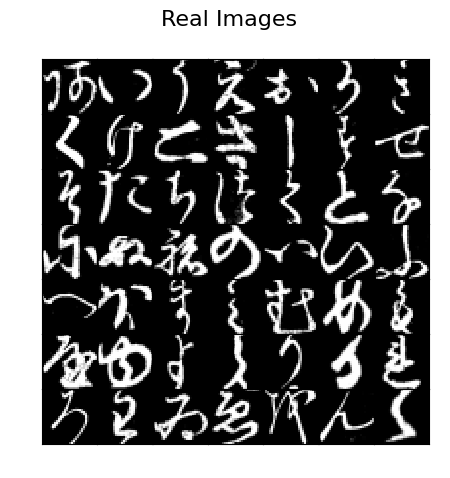

In [13]:
# Visualize original images
visualize_images(train_imgs, train_labels, title="Real Images")

In [14]:
# Define a threshold for binarizing the images
threshold = 127  # Since images are in range [0, 255]

In [15]:
# Function to count foreground pixels
def count_foreground_pixels(image, threshold=127):
    binary_image = image > threshold
    pixels = np.sum(binary_image)
    return pixels

In [16]:
# Process train and test datasets
def process_dataset(imgs, labels):
    # Initialize storage for pixel counts
    pixel_counts = []
    styles = []

    # Calculate pixel counts for each image
    for img in imgs:
        pixel_count = count_foreground_pixels(img)
        pixel_counts.append(pixel_count)

    # Convert lists to numpy arrays
    pixel_counts = np.array(pixel_counts)

    # Calculate median pixel count for each class
    medians = {}
    for cls in np.unique(labels):
        cls_pixel_counts = pixel_counts[labels == cls]
        medians[cls] = np.median(cls_pixel_counts)

    # Assign 'thick' or 'thin' labels based on median
    # 1 means 'thick' and 0 means 'thin'
    for i, (pixel_count, label) in enumerate(zip(pixel_counts, labels)):
        style = 1 if pixel_count > medians[label] else 0
        styles.append(style)

    return np.array(styles)

In [17]:
# Process the datasets
train_styles = process_dataset(train_imgs, train_labels)
test_styles = process_dataset(test_imgs, test_labels)

In [21]:
# Verify size of style data sets created
print(train_styles)
print(test_styles)
print(len(train_styles))
print(len(test_styles))

[0 1 0 ... 0 1 0]
[1 1 0 ... 1 0 0]
232365
38547


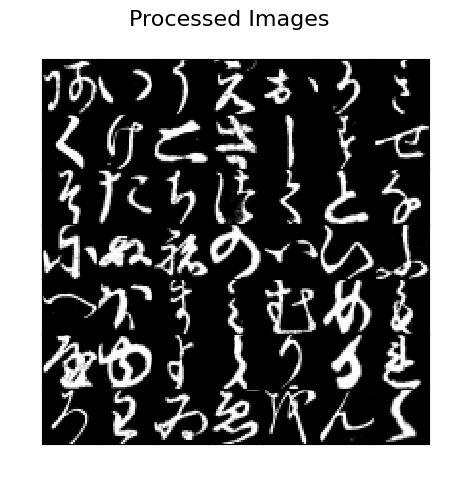

In [22]:
# Visualize processed images with styles
visualize_images(train_imgs, train_labels, train_styles, title="Processed Images")

In [23]:
# Save the styles data sets
np.savez('k49-train-style.npz', styles=train_styles)
np.savez('k49-test-style.npz', styles=test_styles)